In [189]:
# Bibliotecas
import csv
import pandas as pd
import random
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

%matplotlib inline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [190]:
# Abrir dataset TEST.CSV
df_test = pd.read_csv('test.csv')
df_test.shape

(200000, 201)

In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [192]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [193]:
# Abrir dataset TRAIN.CSV
df_train = pd.read_csv('train.csv')
df_train.shape

(200000, 202)

In [194]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [195]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [196]:
# Abrir dataset SAMPLE SUBMISSION.CSV
df_sample_submission = pd.read_csv('sample_submission.csv')
df_sample_submission.shape

(200000, 2)

In [197]:
df_sample_submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [198]:
# Checar nulos
df_train_null_s = df_train.isnull().sum()
df_test_null_s = df_test.isnull().sum()
print(df_train_null_s[df_train_null_s>0])
print(df_test_null_s[df_test_null_s>0])

Series([], dtype: int64)
Series([], dtype: int64)


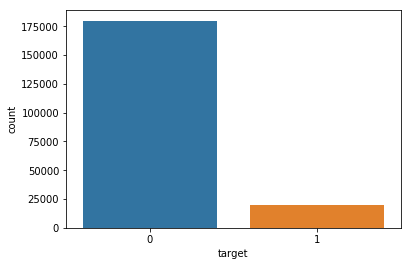

In [199]:
# Verificar distribuição
sns.countplot(df_train["target"])

In [200]:
# Verificar distribuição
df_train["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [201]:
# Balancear dataset treino por undersampling
df_train_0 = df_train[df_train['target']==0]
df_train_1 = df_train[df_train['target']==1]

df_train_0 = df_train_0.sample(df_train_1.shape[0], replace=True)
df_train_under = pd.concat([df_train_0, df_train_1], ignore_index=True)

del df_train_0, df_train_1
df_train_under['target'].value_counts()

1    20098
0    20098
Name: target, dtype: int64

In [202]:
# Seperar dataset treino
X = df_train_under.drop(['ID_code', 'target'],axis=1)
y = df_train_under["target"]

In [203]:
# Normalizar dataset treino
modelo_sc = StandardScaler()
modelo_sc.fit(X)
scaled_features = modelo_sc.transform(X)
X = pd.DataFrame (scaled_features,columns = X.columns)

In [204]:
# Visualizar dataset treino
X.describe().T.round(3).head()

,count,mean,std,min,25%,50%,75%,max
var_0,40196.0,0.0,1.0,-3.309,-0.743,-0.048,0.669,2.716
var_1,40196.0,0.0,1.0,-3.065,-0.764,0.009,0.727,2.834
var_2,40196.0,-0.0,1.0,-2.917,-0.762,-0.048,0.664,2.713
var_3,40196.0,0.0,1.0,-3.310,-0.752,0.016,0.745,2.973
var_4,40196.0,0.0,1.0,-3.202,-0.737,0.021,0.727,3.029


In [ ]:
# Encontrar melhor modelo
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()]

for clf in classifiers:
    model = clf
    model.fit(X, y)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)  
    print('****Results****')
    print("roc_auc:", cross_val_score(model, X, y, cv =3, scoring = "roc_auc").mean())
    print("accuracy:", cross_val_score(model, X, y, cv =3, scoring = "accuracy").mean())
    print("precision:", cross_val_score(model, X, y, cv =3, scoring = "precision").mean())

KNeighborsClassifier
****Results****


In [205]:
# Executar GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X, y)
name = model_GaussianNB.__class__.__name__
    
print("="*30)
print(name)  
print('****Results****')
print("roc_auc:", cross_val_score(model_GaussianNB, X, y, cv =5, scoring = "roc_auc").mean())
print("accuracy:", cross_val_score(model_GaussianNB, X, y, cv =5, scoring = "accuracy").mean())
print("precision:", cross_val_score(model_GaussianNB, X, y, cv =5, scoring = "precision").mean())

GaussianNB
****Results****
roc_auc: 0.8876282812555448
accuracy: 0.8068472083474145
precision: 0.8102450341417965


0.8905275212261986

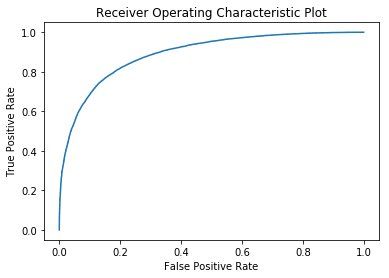

In [206]:
# Visualizar GaussianNB AUC
fpr, tpr, thr = roc_curve(y , model_GaussianNB.predict_proba(X)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc(fpr, tpr)

In [207]:
# Executar LinearRegression
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X, y)
name = model_LinearRegression.__class__.__name__
cross_val_score(model_LinearRegression, X, y, cv =10,).mean()

-36.92581382864989

In [222]:
X_test = df_test.drop(['ID_code'], axis=1)

In [223]:
df_result = df_test[['ID_code']]

In [224]:
# Normalizar dataset treino
scaled_features = modelo_sc.transform(X_test)
X_test = pd.DataFrame (scaled_features,columns = X_test.columns)

In [225]:
#df_result['target_GaussianNB'] = model_GaussianNB.predict_proba(X_test)[:,1]
df_result['target_GaussianNB'] = model_GaussianNB.predict_proba(X_test)[:,1]

In [226]:
df_result['target_LinearRegression'] = model_LinearRegression.predict(X_test)

In [227]:
df_result['target_media'] = (df_result['target_LinearRegression']+df_result['target_GaussianNB'])/2

In [228]:
#df_result['target'] = df_result['target_media'].apply(lambda x: 0 if x <= 0.5 else 1)
df_result['target'] = df_result['target_media']

In [229]:
df_result = df_result.drop(['target_GaussianNB', 'target_LinearRegression', 'target_media'],axis=1)

In [230]:
df_result.to_csv('submission10.csv', index=False)

In [231]:
df_result.head()

,ID_code,target
0,test_0,0.579626
1,test_1,0.651021
2,test_2,0.508133
3,test_3,0.581877
4,test_4,0.323842


In [49]:
df2 = df_train.groupby('var_2')['ID_code'].nunique()

In [50]:
df2.sort_values().tail()

var_2
8.6017     11
11.4556    11
9.7313     11
10.1126    11
9.1497     12
Name: ID_code, dtype: int64

In [51]:
df3 = df_test.groupby('var_2')['ID_code'].nunique()

In [52]:
df3.sort_values().tail()

var_2
10.1724    19
10.1302    19
12.2659    20
9.6560     20
10.3544    21
Name: ID_code, dtype: int64

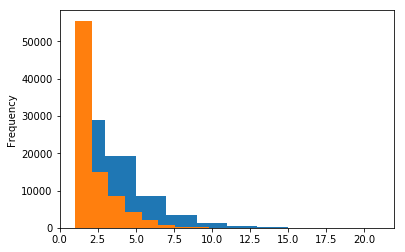

In [57]:
x = df_test.groupby('var_2')['ID_code'].nunique().plot.hist(bins=10)
y = df_train.groupby('var_2')['ID_code'].nunique().plot.hist(bins=10)

plt.show()

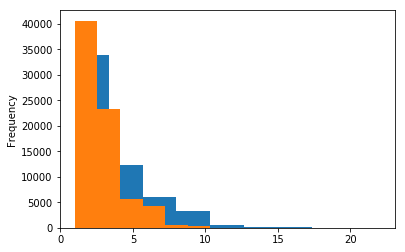

In [58]:
x = df_test.groupby('var_3')['ID_code'].nunique().plot.hist(bins=9)
y = df_train.groupby('var_3')['ID_code'].nunique().plot.hist(bins=9)

plt.show()

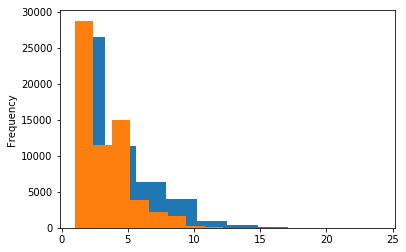

In [59]:
x = df_test.groupby('var_4')['ID_code'].nunique().plot.hist(bins=10)
y = df_train.groupby('var_4')['ID_code'].nunique().plot.hist(bins=10)

plt.show()

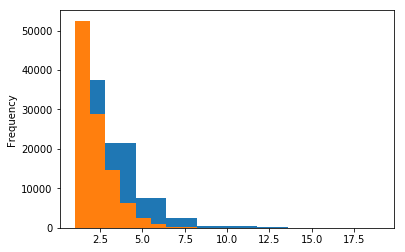

In [60]:
x = df_test.groupby('var_110')['ID_code'].nunique().plot.hist(bins=10)
y = df_train.groupby('var_110')['ID_code'].nunique().plot.hist(bins=10)

plt.show()

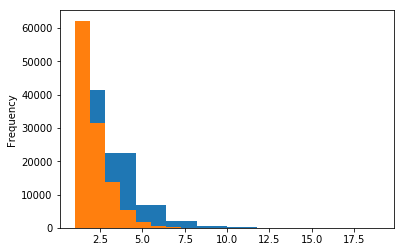

In [61]:
x = df_test.groupby('var_190')['ID_code'].nunique().plot.hist(bins=10)
y = df_train.groupby('var_190')['ID_code'].nunique().plot.hist(bins=10)

plt.show()

In [62]:
df_test2 = df_test.copy()

In [63]:
df_test2.drop(['ID_code'], axis=1, inplace=True)
df_test2 = df_test2.values

unique_samples = []
unique_count = np.zeros_like(df_test2)
for feature in (range(df_test2.shape[1])):
    , index, count_ = np.unique(df_test2[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1


real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print('real samples' ,len(real_samples_indexes))
print('synthetic samples', len(synthetic_samples_indexes))

NameError: name 'index_' is not defined